In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

I am using the Uber trip for September month of New York city

In [2]:
df=pd.read_csv('uber.csv')

In [3]:
df.shape

(1028136, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


In [5]:
df['Date/Time']=pd.to_datetime(df['Date/Time'])

In [6]:
df.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [7]:
df.columns=['Date/Time','Latitude','Longitude','Base']

In [8]:
df.head()

,Date/Time,Latitude,Longitude,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [9]:
df['Day']=df['Date/Time'].dt.day
df['WeekDay']=df['Date/Time'].dt.weekday
df['Hour']=df['Date/Time'].dt.hour

In [10]:
df.head()

,Date/Time,Latitude,Longitude,Base,Day,WeekDay,Hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


In [56]:
df.isnull().sum()

Date/Time    0
Latitude     0
Longitude    0
Base         0
Day          0
WeekDay      0
Hour         0
dtype: int64

In [57]:
df.describe()

,Latitude,Longitude,Day,WeekDay,Hour
count,1.028136e+06,1.028136e+06,1.028136e+06,1.028136e+06,1.028136e+06
mean,4.073922e+01,-7.397182e+01,1.555385e+01,2.961477e+00,1.409235e+01
std,4.082861e-02,5.831413e-02,8.448335e+00,1.942572e+00,5.971244e+00
min,3.998970e+01,-7.477360e+01,1.000000e+00,0.000000e+00,0.000000e+00
25%,4.072040e+01,-7.399620e+01,8.000000e+00,1.000000e+00,1.000000e+01
50%,4.074180e+01,-7.398310e+01,1.600000e+01,3.000000e+00,1.500000e+01
75%,4.076120e+01,-7.396280e+01,2.300000e+01,5.000000e+00,1.900000e+01
max,4.134760e+01,-7.271630e+01,3.000000e+01,6.000000e+00,2.300000e+01


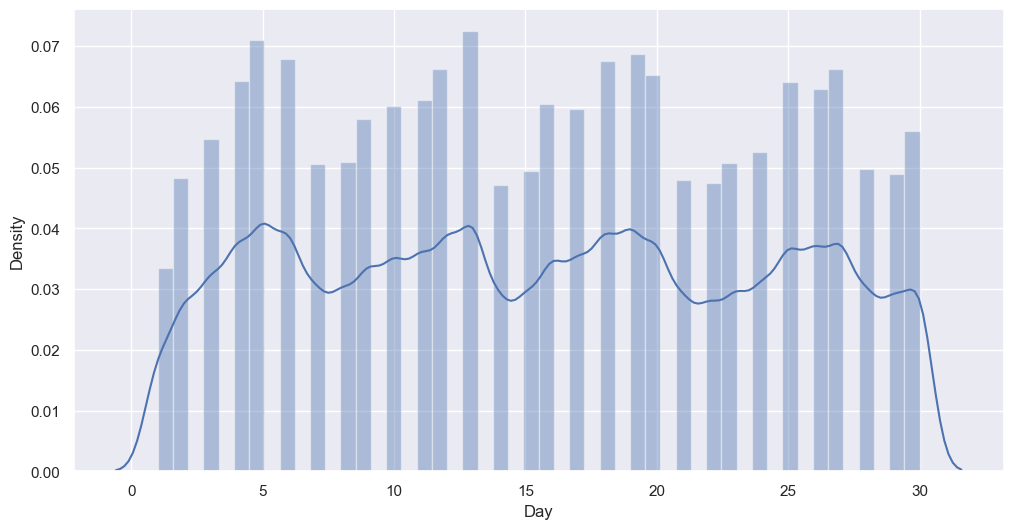

In [18]:
plt.figure(figsize=(12,6))
sns.distplot(df['Day'])
plt.show()

As it is clear from above figure that Uber trips are rising on weekdays and declining on weekends

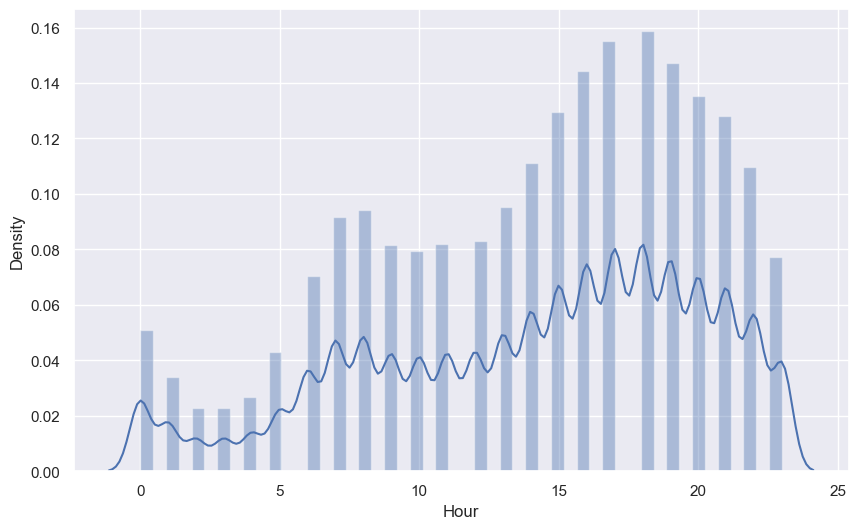

In [16]:
plt.figure(figsize=(10,6))
sns.distplot(df['Hour'])
plt.show()

As it is clear from above picture that Uber trips increase from 5am and it keep on increasing till 6pm such that 6pm is the busiest schedule for Uber, then it starts decreasing. It is smallest during midnight.

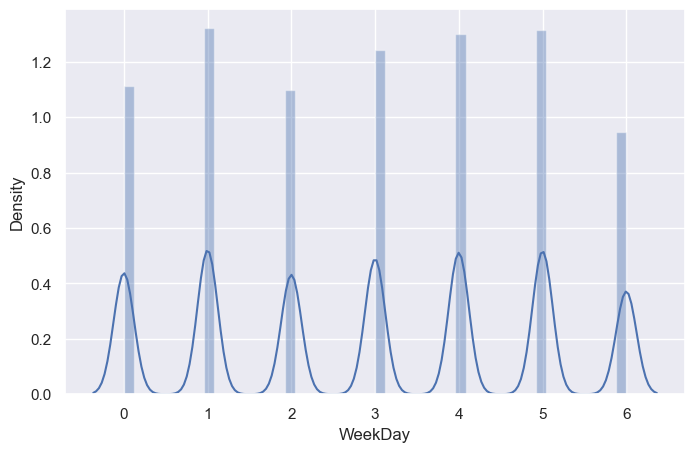

In [19]:
plt.figure(figsize=(8,5))
sns.distplot(df['WeekDay'])
plt.show()

In the above figure 0--> Sunday, 1--> Monday, 2--> Tuesday, 3--> Wednesday, 4--> Thursday, 5--> Friday, 6--> Saturday 
Uber trips are highest on Monday and lowest on Saturday. Sunday has more Uber trips than Saturday which means people use Uber for outings rather than just for work.

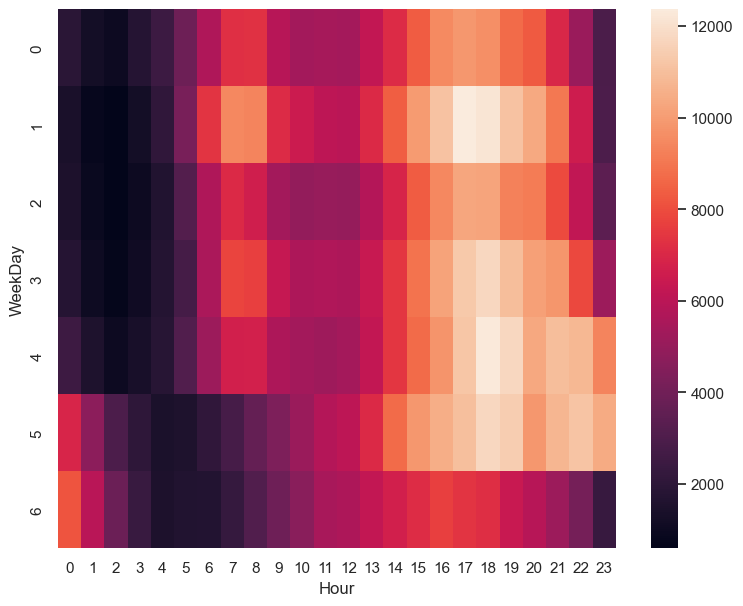

In [44]:
plt.figure(figsize=(9,7))
df1 = df.groupby(['WeekDay','Hour']).apply(lambda x: len(x))
df1 = df1.unstack()
sns.heatmap(df1, annot=False)
plt.show()

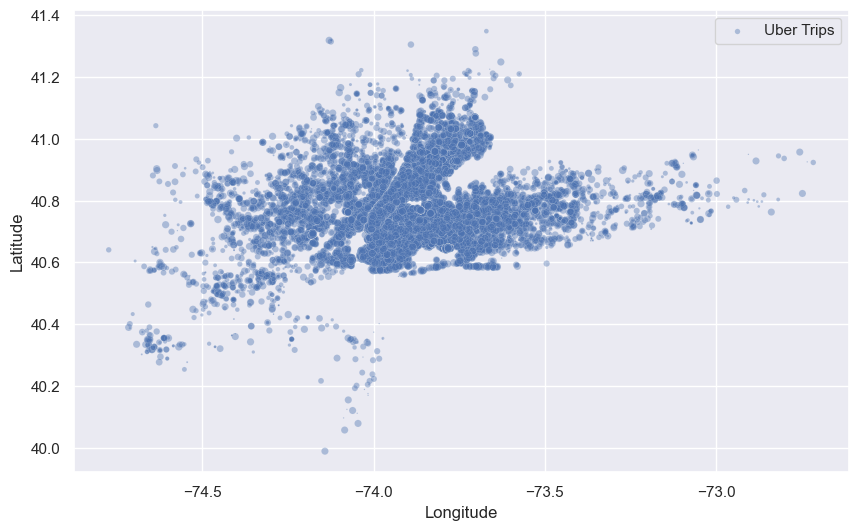

In [54]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Longitude',y='Latitude',alpha=0.4,s=df['Day'],data=df,label='Uber Trips')
plt.legend()
plt.show()

# Outcome

Monday is the most profitable day for Uber

On Saturdays less number of people use Uber

6 pm is the busiest day for Uber

On average a rise in Uber trips start around 5 am